1 12
{'initial_point': [array([ 2.        , -3.14159265])], 'maxeval': [4, 5, 6, 7, 8, 9, 10, 15, 20, 25, 30, 35, 40, 45, 50], 'initial_step': [0.01, 0.0301010101010101, 0.050202020202020206, 0.0703030303030303, 0.0904040404040404, 0.11050505050505051, 0.13060606060606061, 0.15070707070707073, 0.17080808080808083, 0.19090909090909092, 0.21101010101010104, 0.23111111111111113, 0.2512121212121212, 0.27131313131313134, 0.29141414141414146, 0.3115151515151515, 0.33161616161616164, 0.35171717171717176, 0.3718181818181818, 0.39191919191919194, 0.41202020202020206, 0.43212121212121213, 0.45222222222222225, 0.47232323232323237, 0.49242424242424243, 0.5125252525252526, 0.5326262626262627, 0.5527272727272727, 0.5728282828282829, 0.592929292929293, 0.613030303030303, 0.6331313131313132, 0.6532323232323233, 0.6733333333333333, 0.6934343434343435, 0.7135353535353536, 0.7336363636363636, 0.7537373737373738, 0.7738383838383839, 0.793939393939394, 0.8140404040404041, 0.8341414141414142, 0.854242424242

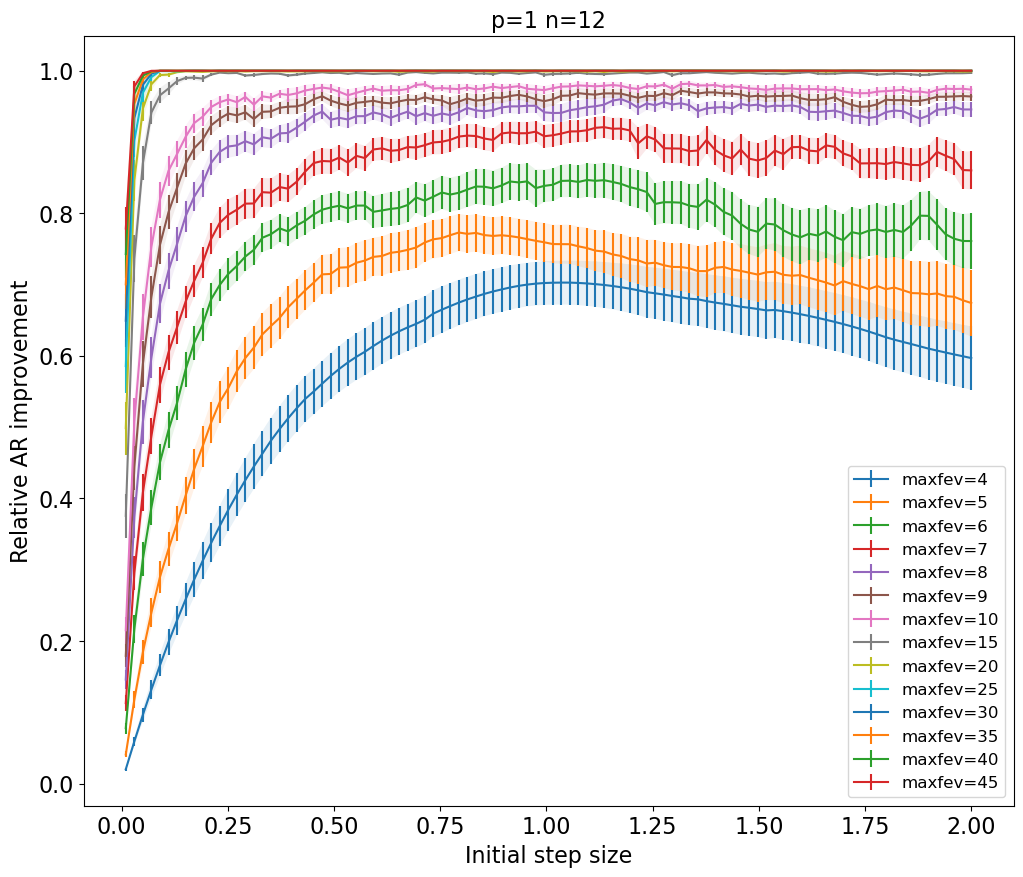

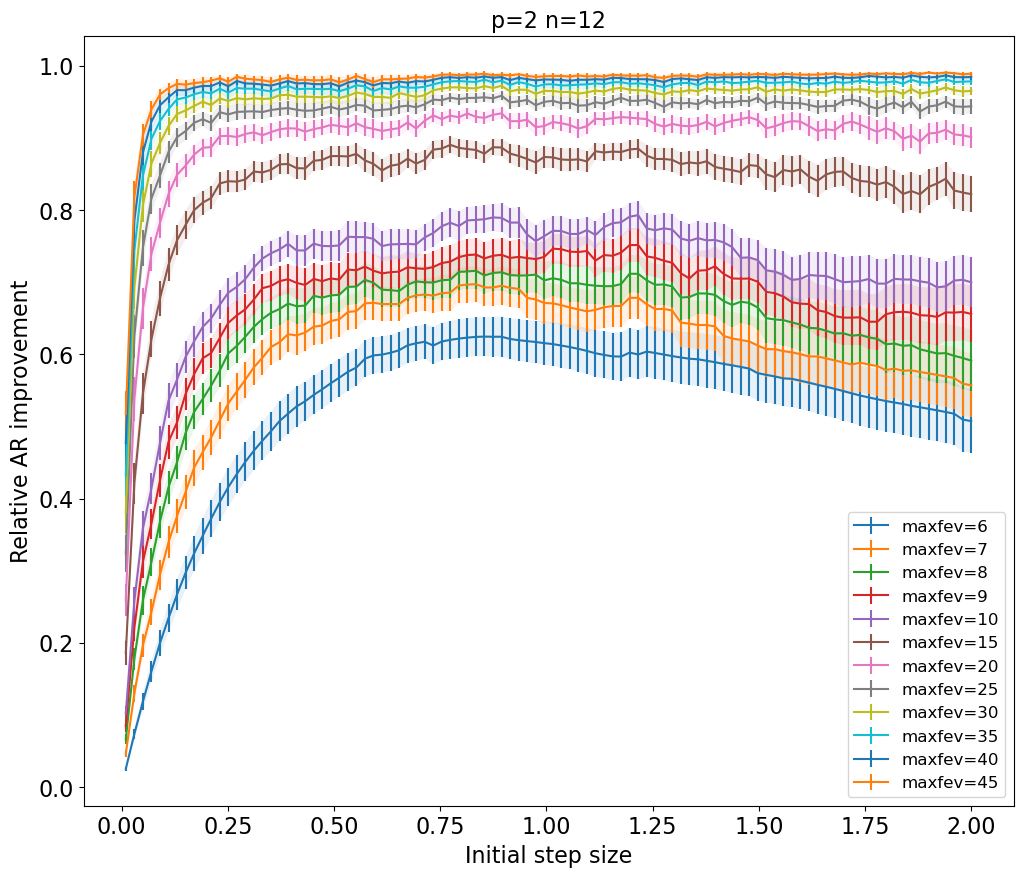

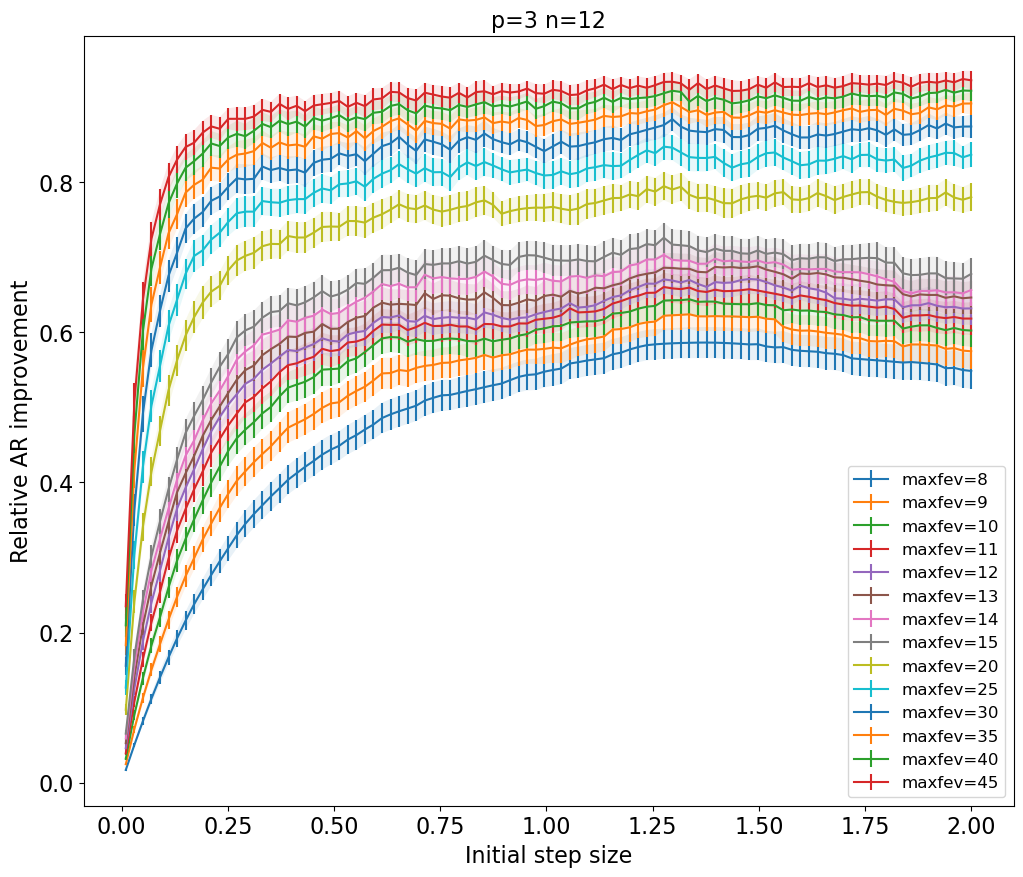

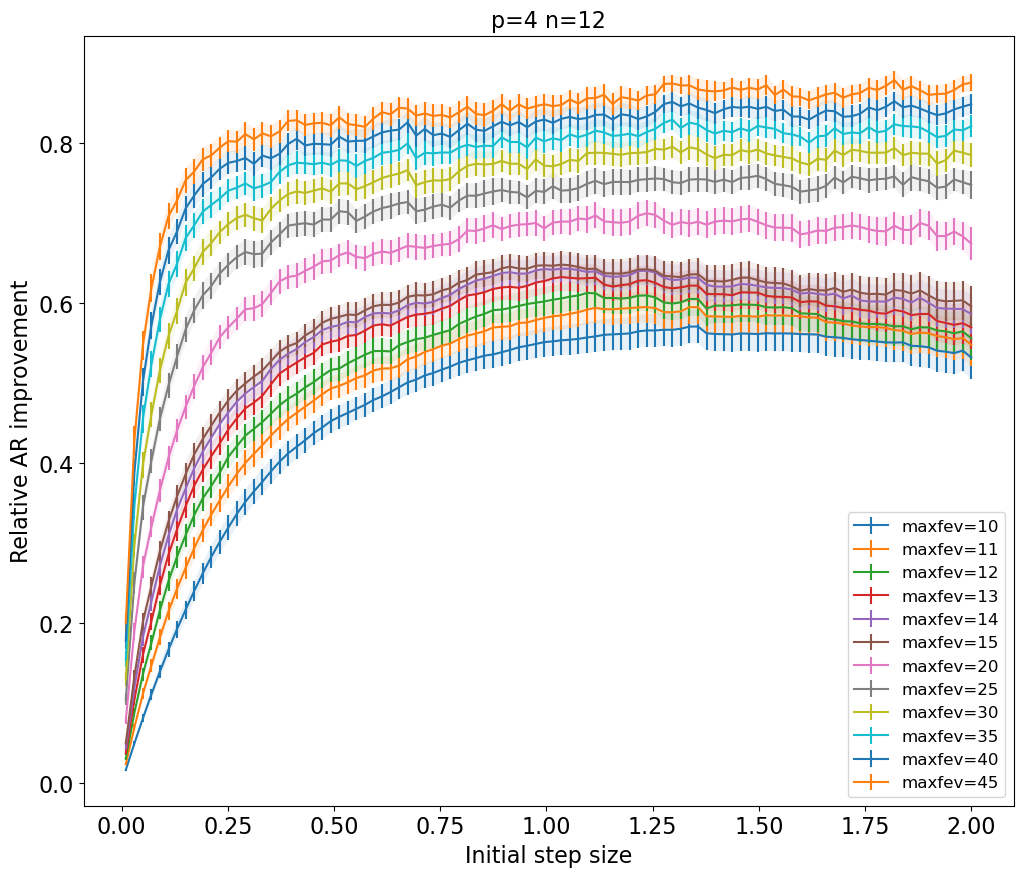

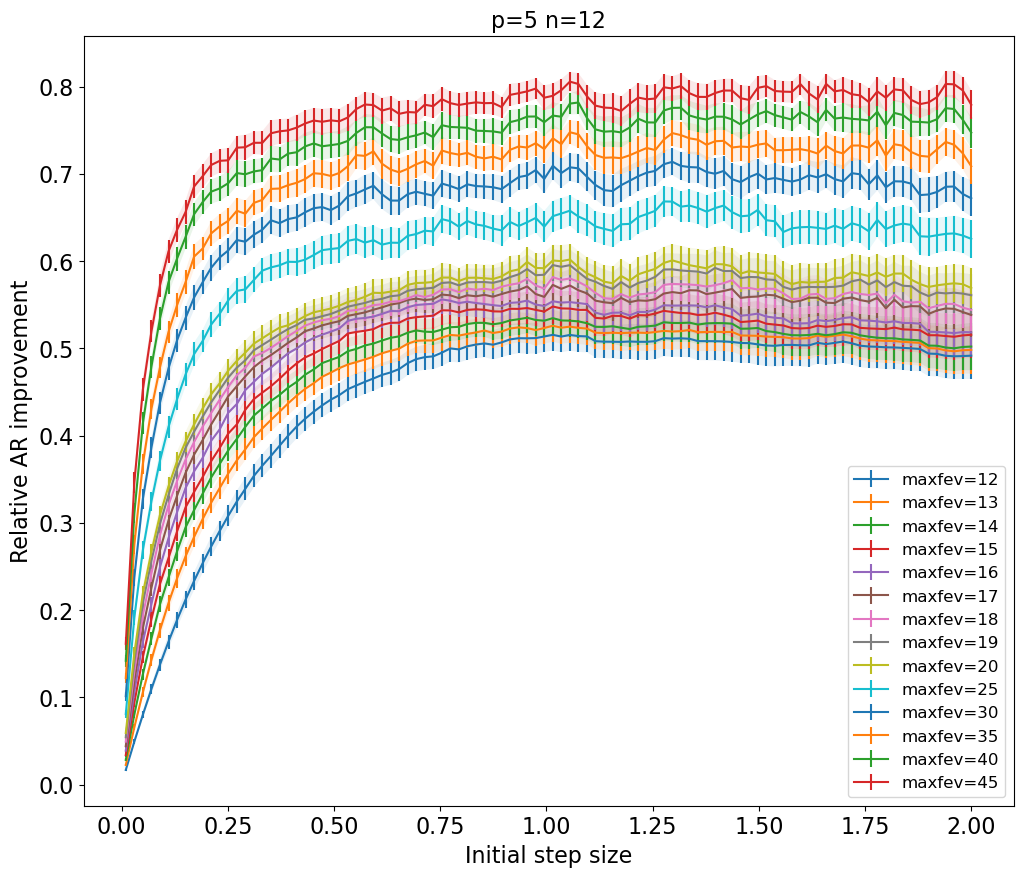

In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np

method = "LN_COBYLA (NLopt)"
problem = "po"
depth_pool = [1, 2, 3, 4, 5]
qubit_pool = list(range(12, 13, 2))
n = 12
seed_pool = list(range(60))
fontsize = 16

for p in depth_pool:
    result, initial_ar, max_ar = [], [], []
    for i, n in enumerate(qubit_pool):
        data = pickle.load(
            open(
                f"data/{problem}/configs/max_ar/{method}-p{p}-q{n}-s0-59.pckl",
                "rb",
            ),
        )
        max_ar.append(data["result"][:len(seed_pool)])

        data = pickle.load(
            open(
                f"data/{problem}/configs/rhobeg/{method}-p{p}-q{n}-s{seed_pool[0]}-{seed_pool[-1]}.pckl",
                "rb",
            ),
        )
        config = data["config"]
        maxfev_pool = config["maxeval"]
        rhobeg_pool = config["initial_step"]
        print(p, n)
        result.append(data["result"])
        initial_ar.append(data["initial_ar"])
    result = np.array(result)
    initial_ar = np.array(initial_ar)[:,:,np.newaxis,np.newaxis]
    max_ar = np.array(max_ar)[:,:,np.newaxis,np.newaxis]
    # max_ar = result[:,:,-1,0][:,:,np.newaxis,np.newaxis]
    result = (result - initial_ar) / (max_ar - initial_ar)
    print(config)

    # plt.figure(figsize=(12, 4))
    # bar_width = 0.3
    # colors = ["tab:blue", "tab:orange", "pink", "lightblue", "lightgreen", "violet"]
    # for j, (maxfev, c) in enumerate(zip(maxfev_pool, colors)):
    #     ys = np.array(rhobeg_pool)[np.argmax(result[:,:,j], axis=2)]
    #     print(np.median(ys[0]), np.mean(ys[0]))
    #     plt.violinplot(
    #         ys.T,
    #         # sym="+",
    #         positions=np.array(qubit_pool)+bar_width*j,
    #         widths=bar_width,
    #         showmeans=True,
    #         # showmedians=True,
    #     )
    #     plt.plot([], c=c, label=f"{maxfev=}")
    # plt.xticks(np.array(qubit_pool) + bar_width * (len(maxfev_pool)-1) / 2, labels=qubit_pool)
    # plt.ylabel("rhobeg")
    # plt.title(f"{p=}")
    # plt.legend()

    plt.figure(figsize=(12, 10))
    for j, maxfev in enumerate(maxfev_pool[:-1]):
        ys = result[:,:,j]
        y = np.mean(ys, axis=(0, 1))
        std_err = np.std(ys, axis=(0, 1)) / np.sqrt(len(seed_pool))
        plt.errorbar(rhobeg_pool, y, yerr=std_err, label=f"{maxfev=}")
        plt.fill_between(rhobeg_pool, y - std_err, y + std_err, alpha=0.1)

    # plt.xlim((0, 0.2))
    plt.ylabel("Relative AR improvement", fontsize=fontsize)
    plt.xlabel("Initial step size", fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.title(f"{p=} {n=}", fontsize=fontsize)
    plt.legend(fontsize=fontsize-4)
    # plt.savefig(f"figs/{problem}/rhobeg/{method}-p{p}-q{n}.png")
